Episode 0


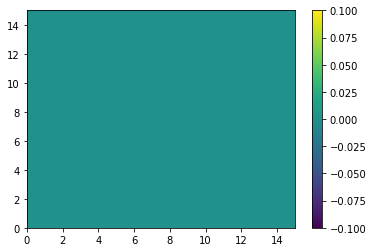

Episode 20


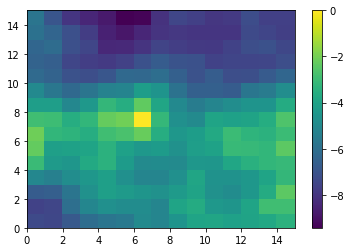

Episode 40


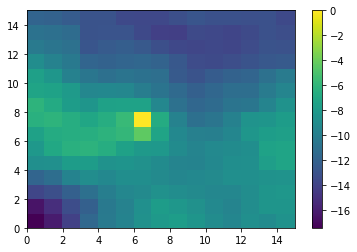

Episode 60


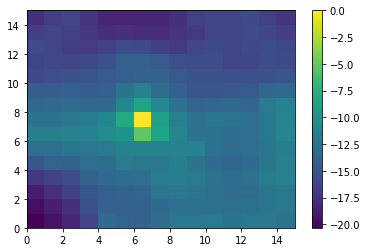

Episode 80


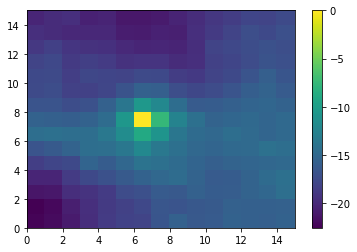

Episode 100


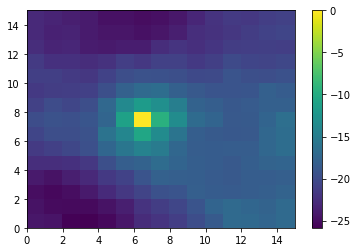

Episode 120


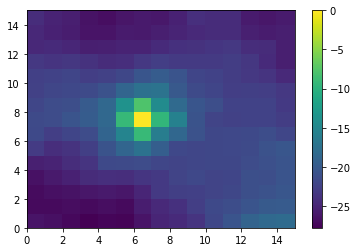

Episode 140


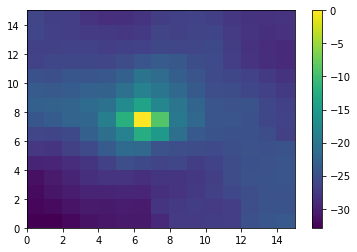

Episode 160


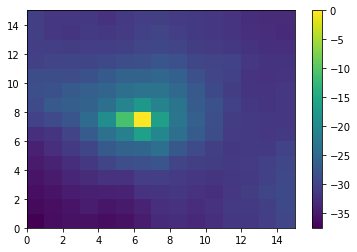

Episode 180


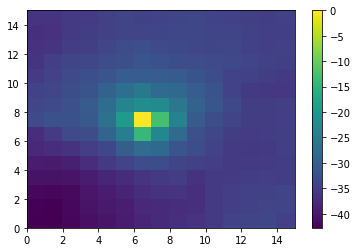

Episode 200


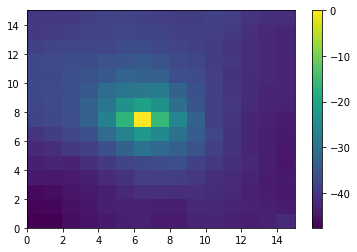

Episode 220


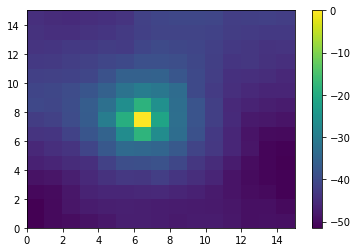

Episode 240


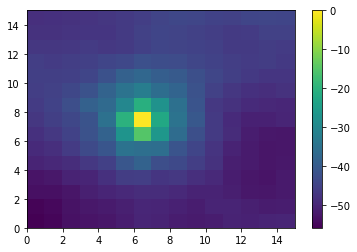

Episode 260


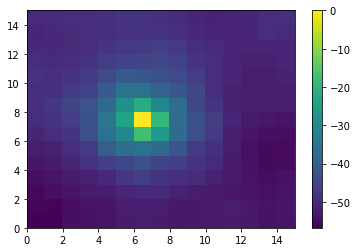

Episode 280


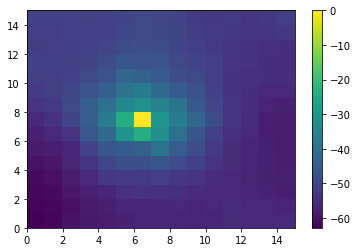

Reached max number of episodes: 300
Episode 300


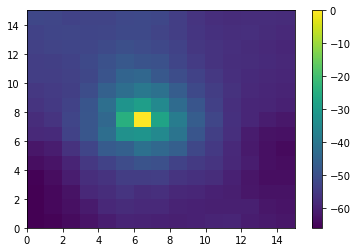

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import TabularTD0
from myelin.core import RLInteraction, MDPEnvironment
from myelin.core.termination import MaxEpisodes
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS, COLS = 15, 15
mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
value_function = np.zeros((ROWS, COLS))
agent = TabularTD0(policy, value_function)


def display():
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(value_function)
    plt.colorbar()
    plt.show()


class LearningMonitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 20 == 0:
            print('Episode {}'.format(episode))
            display()

    def on_interaction_end(self, episode):
        print('Episode {}'.format(episode))
        display()


RLInteraction(
    env=env,
    agent=agent,
    callbacks=[LearningMonitor()],
    termination_conditions=[MaxEpisodes(n_episodes=300)]
).start()
